In [1]:
from collections import defaultdict
from random import random
import pysam
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import glob
import os
import sklearn
from sklearn import cluster
import cPickle as pickle

/home/avi/miniconda2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
kal = pd.read_csv('./kal-1k.mat', index_col=[0])
utl = pd.read_csv('./utl-1k.mat', index_col=[0])
alv = pd.read_csv('./fast-eq-1k.mat', index_col=[0])

In [3]:
tr_results = pd.read_table("../../featureDump/tenx_counts_new/outs/filtered_gene_bc_matrices/hg19/barcodes.tsv", header=None)[0].values
# tr_results['tr'] = [0]*504 + [1]*516
# import collections
# print [item for item, count in collections.Counter(tr_results.index).items() if count > 1]
# tr_results = tr_results.drop(['AGCTCCTGTTGTGGAG', 'ACGCCAGTCGGATGGA', 'GGCAATTAGGAATCGC'])
tr_results = [x.replace("-1", "") for x in tr_results]

In [4]:
tenx = pd.read_table("../../featureDump/tenx_counts_new/outs/human_counts.tsv", sep=',').set_index("Unnamed: 0")
tenx.index = [x.replace("hg19_","") for x in tenx.index]
tenx.columns = [x.replace("-1","") for x in tenx.columns]
# tenx = tenx.drop(['AGCTCCTGTTGTGGAG', 'ACGCCAGTCGGATGGA', 'GGCAATTAGGAATCGC'], 1)

In [5]:
tenx.shape, utl.shape, kal.shape, alv.shape
# utl.shape, kal.shape, alv.shape

((58278, 501), (44021, 1017), (51937, 1017), (53284, 1017))

In [6]:
def get_corr_list(df):
    df_list = []
    for x in df.corr(method="spearman").values:
        for e in x.tolist():
            if e !=0 and e != 1:
                df_list.append(e)
    return df_list

In [7]:
# first_cluster = tr_results[tr_results['tr'] == 1].index
# second_cluster = tr_results[tr_results['tr'] == 0].index

In [8]:
na = [x for x in tr_results if x in utl.columns]

In [9]:
usub = utl[na].fillna(0)
ksub = kal[na].fillna(0)
asub = alv[na].fillna(0)
tsub = tenx[na].fillna(0)

usub = usub[(usub.T != 0).any()]
ksub = ksub[(ksub.T != 0).any()]
asub = asub[(asub.T != 0).any()]
tsub = tsub[(tsub.T != 0).any()]

In [10]:
tsub.shape, usub.shape, ksub.shape, asub.shape
# usub.shape, ksub.shape, asub.shape

((21903, 501), (35063, 501), (41150, 501), (42424, 501))

In [13]:
usub.drop([x for x in usub.index if 'ENSMUSG' in x ], inplace=True)

ksub.drop([x for x in ksub.index if 'ENSMUSG' in x ], inplace=True)

asub.drop([x for x in asub.index if 'ENSMUSG' in x ], inplace=True)

tenx.drop([x for x in tenx.index if 'ENSMUSG' in x ], inplace=True)
# tenx.index = [x.replace('mm10_','') for x in tenx.index]

In [14]:
tsub.shape, usub.shape, ksub.shape, asub.shape

((21903, 501), (24470, 501), (28596, 501), (28944, 501))

In [17]:
usub = usub.loc[tsub.index]
ksub = ksub.loc[tsub.index]
asub = asub.loc[tsub.index]

In [18]:
tsub.shape, usub.shape, ksub.shape, asub.shape

((21903, 501), (21903, 501), (21903, 501), (21903, 501))

In [19]:
sum(tsub.sum()), sum(usub.sum()), sum(ksub.sum()), sum(asub.sum())

(17618591, 16255142.0, 18260462.0, 18056122.0)

In [20]:
utl_list = get_corr_list(usub)
kal_list = get_corr_list(ksub)
alv_list = get_corr_list(asub)
tenx_list = get_corr_list(tenx)

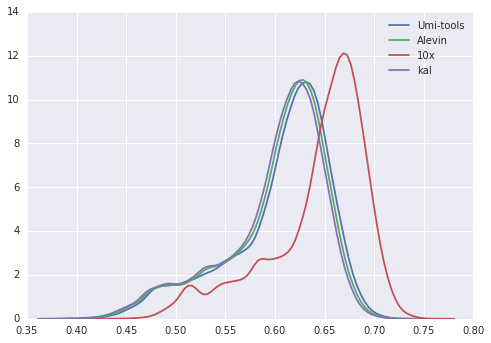

In [21]:
#human
sns.kdeplot(np.array(utl_list), label = "Umi-tools")
sns.kdeplot(np.array(alv_list), label = "Alevin")
sns.kdeplot(np.array(tenx_list), label = "10x")
sns.kdeplot(np.array(kal_list), label = "kal")
plt.legend()

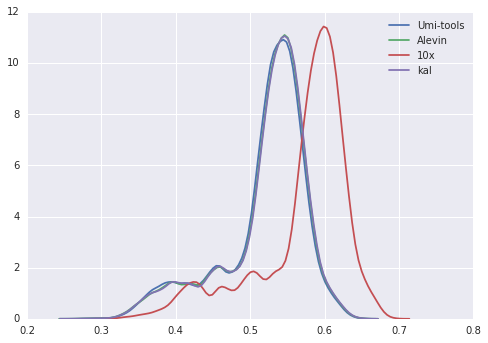

In [19]:
#mouse
sns.kdeplot(np.array(utl_list), label = "Umi-tools")
sns.kdeplot(np.array(alv_list), label = "Alevin")
sns.kdeplot(np.array(tenx_list), label = "10x")
sns.kdeplot(np.array(kal_list), label = "kal")
plt.legend()

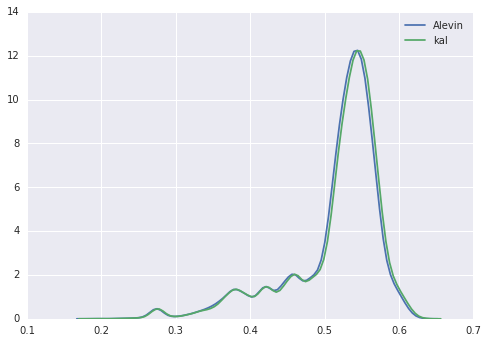

In [28]:
sns.kdeplot(np.array(alv_list), label = "Alevin")
sns.kdeplot(np.array(kal_list), label = "kal")
plt.legend()